# Final Project Submission
Please fill out:

1-Student name: Mays Alkhwitar

2-Student pace: flex

3-Scheduled project review date/time: 

4-Instructor name: Mark Barbour

5-Blog post URL:https://

# Predicting Alzheimer's Disease by classifying MRI Images



![images.jpg](images/images.jpg)

## Project Overview

Through this project, We will build a classifier model to analyze a set of brain MRI Images for detecting Alzheimer's Disease. The model can classify data based on reading the brain MRI Images. Create a predictive classification model that makes it possible to understand the business problem, solve it and report the findings of the final model, including predictions and performance metrics.

## Business Problem 

Alzheimer's disease (AD) is an irreversible brain degenerative disorder affecting people aged older than 65 years. Currently, there is no effective cure for AD, but some treatments can delay its progression. Accurate and early diagnosis of AD is vital for patient care and the development of future treatment.

The main motive behind the project is developing a classification model for detecting AlzheimerDisease to help Alzheimer’s researchers in New york Alzheimer’s center-continue to pursue drug treatments for the disease, most agree that successful treatment will hinge on early detection and on finding ways to head off brain damage before the later stages of Alzheimer’s .



## Data Understanding

This project uses the [Alzheimer MRI dataset from Kaggle](https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset), The Data collected from several websites/hospitals/public repositories.
The Dataset consists of a total of 6400 MRI images. The images stored in .jpeg files under the folder '/Dataset'.All the images are resized into 128 x 128 pixels.
the target is divided into four classes :

Class - 1: Mild Demented (896 images)

Class - 2: Moderate Demented (64 images)

Class - 3: Non-Demented (3200 images)

Class - 4: Very Mild Demented (2240 images)





## Data Preparation

Image classification algorithms are trained and tested using image datasets.Supervised models are trained and tested using labeled image datasets.

Another common use of image datasets is as a benchmark for computer vision algorithms. Applying multiple algorithms to the same dataset can be an effective way to compare their performance for a given task.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt

After imported all the necessary libraries and functions , we'll need to get the dataset.

### Importing the dataset

Let's start by importing the dataset from the directory.

In [2]:
# Create a folder in which you add the images
DATADIR = "Dataset"


DATADIR is a string assigned to the file path containing the training data.

In [3]:
# folders of each class of images
CATEGORIES = ["Mild_Demented","Moderate_Demented","Non_Demented","Very_Mild_Demented"]

In [4]:
CATEGORIES

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

Next,create a loop to reach the images of the four categories

The os.path.join method joins the paths, so the file path to the training data (DATADIR) is joined with the categories. 

cv2.imread() loads an image from the joint file path (training path and categories).

Label: Mild_Demented


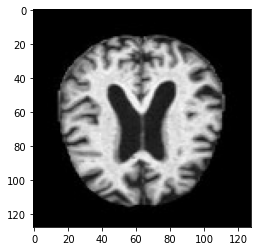

Label: Moderate_Demented


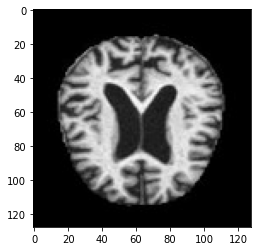

Label: Non_Demented


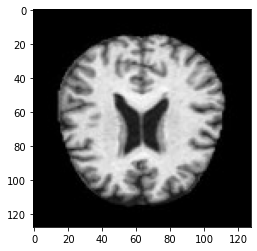

Label: Very_Mild_Demented


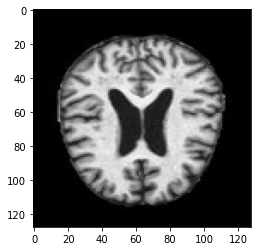

In [5]:
# loop to reach the catogory of the four categories
for category in CATEGORIES:
    # create a path for each class
    path = os.path.join(DATADIR,category )
    # loop to reach the image of the four categories
    for img in os.listdir(path):
        #read the image
        img_array = cv2.imread(os.path.join(path,img))
        label =category 
        # display the image
        plt.imshow(img_array)
        print('Label: {}'.format(label))
        plt.show()
        break
    


 Image is diplayed from each catogory.

In [6]:
#display the image array
print(img_array)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


Let's check the dimensionality of the image by using the .shape method.

In [7]:
# display the shape of image
print(img_array.shape)

(128, 128, 3)


The shape of image is (128, 128, 3). This particular image is the same shape,

### Preprocessing

Now, we'll perform the necessary preprocessing on our dataset before training our model.We preprocessed each image by:

1-Resizing the image.

In [8]:
#new size
IMG_SIZE = 100

Label: Very_Mild_Demented


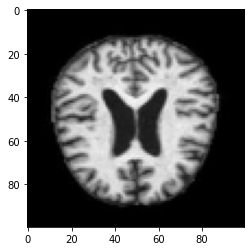

In [9]:
# resizing the image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
print('Label: {}'.format(label))
plt.show()



The image size changed from 128x128 to 100x100

In [10]:
len(CATEGORIES)

4

In [11]:
DATADIR

'Dataset'

Next, create a function to match the image with the category to which the image belongs to it. An index loop will be used to match a photo to each category. The next for loop, as previously mentioned, iterate through the images in the file path. listdir() will return a list of images. cv2.imread() loads an image from the joint file path. AAll this is appended to training data, in a list, because the append method only takes in one argument, and the list allows us to hold two.

In [12]:
# create a function to match the image and the catogory
def Data():
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #class_num = CATEGORIES.index(category)
        label = category
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, label])
    return data
data = Data()

In [13]:
data

[[array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  'Mild_Demented'],
 [array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
   

To find the length of the data, print the length.

In [14]:
len(data)

6400

Our data consist of 6400 

2-Shuffling of data

Random shuffling of data is a standard procedure in all machine learning.When we say shuffle a list, it means a change in the order of list items.e.g putting all the images relatted to the spesific class first ,then the images relatted to the other class second and so on.

In [15]:
#shuffling of data 
from numpy import *
random.shuffle(data)

3- Assigning Labels and Features
 
This shape of both the lists will be used in Classification using the NEURAL NETWORKS.

We need to pair the arrays of the image with their labels.

In [16]:
# Assigning Labels and Features
X =[]
y =[]
for features, label in data:
    X.append(features)
    y.append(label)


### Checking for target distribution

We will create a Pandas Dataframe to discover the counts of each class.

In [17]:
#create a data frame
df = pd.DataFrame({'img':X, 'label':y})
df.head()

,img,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Mild_Demented
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Non_Demented
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Non_Demented
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Non_Demented
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Mild_Demented


Let's discover the target column by using the.value_counts() method.

In [18]:
# target counts
df["label"].value_counts()

Non_Demented          3200
Very_Mild_Demented    2240
Mild_Demented          896
Moderate_Demented       64
Name: label, dtype: int64

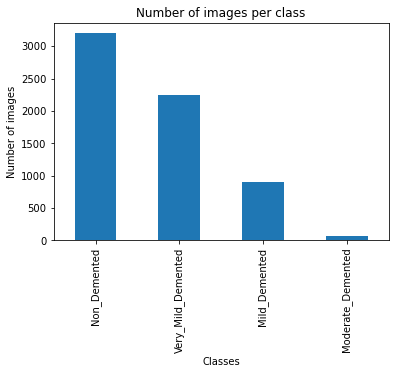

In [19]:
# visualize the target values
df["label"].value_counts().plot(kind='bar')
plt.title('Number of images per class')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.show()

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one column. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labeled in words.

We will use Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [20]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [21]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [22]:
#display y
y

array([0, 2, 2, ..., 0, 3, 2], dtype=int64)

We can notice that the label changed from words to numerical.

Class 0 represents Mild_Demented.

Class 1 represents Moderate_Demented

Class 2 represents Non_Demented

Class 3 represents Very_Mild_Demented.

In [23]:
# convert the featers list to array
X = np.array(X)
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

4-Reshaping the dimensions.

When we feed the images to keras, we need to reshape our dimensions.

In [24]:
# display X shape
X.shape

(6400, 100, 100, 3)

So we’ll use the x.reshape(-1, image_size, image_size, 1). The -1 means that the length in the dimension is inferred so we don’t have to specify it. The 1 is because we’re using a black-and-white picture so we’ll only have one layer of the image. To convert the shape of a NumPy array use the ndarray.reshape() method

In [25]:
# reshape x
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

5- Normalising X and converting labels to categorical data:

In image classification we pull in images into an array of numbers. These numbers represent the pixel intensity, and it’s a number between 0 and 255, 255 being white and 0 being black.we can just divide every pixel by 255 that way we’re left with numbers between 0 and 1, 1 being white and 0 being black.

In [26]:
# Normalising X and set X data to a float type
X = X.astype('float32')
X /= 255

print(shape(X))

(6400, 100, 100, 3)


6- Split X and y to use in neural network models

A dataset is typically split into training , validation, and testing sets. 

Training set: The sample of data used to fit the model.

Validation The sample of data used to provide an unbiased evaluation of a model fit on the training set while tuning model hyperparameters.The validation set is used to evaluate a given model.

Test set: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
For example, 80% of the images can be used to initially train the algorithm (the training set), and the remaining 20% can be used as unseen examples to test the algorithm’s performance (the testing set).

![Sets-1.png](images/Sets-1.png)

In [27]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [28]:
# split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

In [29]:
# display X_train,validation,and test
print(X_train,X_val,X_test)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [30]:
# display X_train shape
X_train.shape


(3840, 100, 100, 3)

X_train consists of 3,840 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

In [31]:
# display X_test shape
X_test.shape


(1280, 100, 100, 3)

X_test consists of 1,280 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

In [32]:
# display X_val shape
X_val.shape

(1280, 100, 100, 3)

X_val consists of 1,280 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

We will display some of train data images samples.

Label: 2


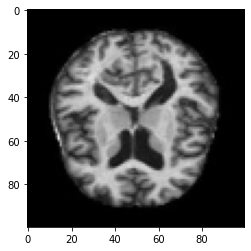

In [33]:
sample_image = X_train[500]
sample_label = y_train[500]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

Label: 2


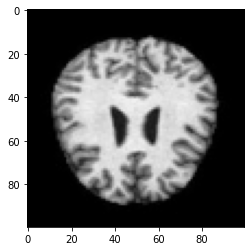

In [34]:
sample2_image = X_train[3000]
sample2_label = y_train[3000]
display(plt.imshow(sample2_image))
print('Label: {}'.format(sample2_label))

In [35]:
# display y_train for 25 position of y_train
y_train[:25]

array([3, 2, 3, 2, 3, 0, 2, 0, 2, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 2], dtype=int64)

As we can see, the labels for each digit image in the training set are stored as the corresponding integer value -- if the image is of a 3, then the corresponding label will be 3. This means that this is a Multiclass Classification problem, which means that we need to One-Hot Encode our labels before we can use them for training.

Keras provides to_categorical() to one-hot encode our labels

In [36]:
# convert labels from muticlasses to one-hot-encoder
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)
y_val = keras.utils.to_categorical(y_val, 4)


Great. Now, let's examine the label for the first data point, which we saw was 3 before.

In [37]:
y_train[0]

array([0., 0., 0., 1.], dtype=float32)

In [38]:
y_train[1]

array([0., 0., 1., 0.], dtype=float32)

In [39]:
y_train[2]

array([0., 0., 0., 1.], dtype=float32)

In [40]:
y_train[4]

array([0., 0., 0., 1.], dtype=float32)

We can notice that labels are  converted to one-hot encode.

## Modeling

Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs — and take actions or make recommendations based on that information.
Computer vision trains machines to observe and understand images.

Two essential technologies are used to accomplish this: a type of machine learning called deep learning and a convolutional neural network (CNN).

### Baseline Model

We'll build a Multi-Layer neural network to solve image classification. 

Keras library can be used to build a neural network to solve a classification problem.

Keras is an API that sits on top of Google’s TensorFlow. 
Basically, a neural network is a connected graph of perceptrons. Each perceptron is just a function. In a classification problem, its outcome is the same as the labels in the classification problem. 

The Keras sequential model:this is the simplest type of data structure in Keras and is basically a sequence of connected layers in a network

In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
#creates a Sequential model
model_1 = keras.models.Sequential(
[keras.layers.Flatten(input_shape =(100,100,3)) ,
keras.layers.Dense(10000, activation = "relu" ),
keras.layers.Dense(5000, activation = "relu" ),
keras.layers.Dense(2000, activation = "relu" ),
                                                                    
keras.layers.Dense(4, activation = "softmax" )])

The Multi-Layer neural network consist of :
    
1- Input Layer:The number of neurons comprising that layer is equal to the number of features (columns) in the data.
The raw pixel values of an image represented as a 3D matrix Dimensions W x H x D. , where depth corresponds to the number of color channels in the image.
The first layer in the model is a flatten layer and is there for pre-processing of the data and it isn’t trainable itself. What this does is take each 100 x 100 NumPy array for each image and flattens it into a 1 x 10000 array that the network can work with. in order to create a correctly-sized input layer!

2- Hidden layers:Following are the thumb-rules for building an MLP. However, most of them are applicable on other Deep Learning models.

Number of Layers: Start with two or three hidden layers (this does not include the last layer).

Number of nodes (size) of intermediate layers: a number from the geometric progression of 2, e.g., 4, 8, 16, 32, … . The first layer should be around half of the number of input data features. The next layer size as half of the previous.

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

relu introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.

3- The output layer
Finally, we add a Dense layer with 4 neurons as there are 4 classes to predict and as they are all exclusive, we use the softmax activation function.

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.



## Compile the model 

The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase. The parameters are required for compilation process are:

loss: Loss function is used to find error in the learning process.There is several types of loss functions in keras library like :(mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_logarithmic_error,squared_hinge,hinge,categorical_hinge,logcosh,huber_loss,categorical_crossentropy,sparse_categorical_crossentropy,binary_crossentropy,kullback_leibler_divergence,poisson,cosine_proximity, and categorical_crossentropy.

optimizer:optimize the input weights by comparing the prediction and the loss function.Keras provides quite a few optimizers like (SGD,RMSprop,Adagrad,Adadelta,Adamax,Nadam ,and Adam)  

metrics : is used to evaluate the performance of your model. Keras provides metrics like (accuracy
,binary_accuracy ,categorical_accuracy,sparse_categorical_accuracy,top_k_categorical_accuracy,
sparse_top_k_categorical_accuracy,cosine_proximity, and clone_metric).

In [43]:
# compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

The loss function to use. In this case we are using categorical_crossentropy.

categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

The optimizer we are going to use to optimise the model against the loss function is stochastic gradient descent and this will ensure the model converges on an optimum solution

Specify a metric that we are going to use in addition to loss to give us an idea of how well our model is working. In this case, we are using accuracy which gives an idea of how well our model is doing by giving a percentage of how many predictions match the actual class for the model we are training

### Inspect the shape of our model before training 

We can use model.summary() to print some information.

In [44]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 10000)             300010000 
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8004      
Total params: 360,025,004
Trainable params: 360,025,004
Non-trainable params: 0
_________________________________________________________________


This network has a total of 360,025,004 trainable parameters (consisting of weights between neurons and bias terms) and this gives the network a lot of flexibility, but it also means that it will be very easy for it to overfit 

#### Fit the model on train set.

Fit()—trains the model, meaning calculates the weights, biases, number of layers, etc.

The batch_size and epochs are the main hyperparameters of the gradient descent algorithm. We specified them in the fit() methods of the model

Epoch—means how many times to run the model.It is an iterative process.

Metrics—means what metrics to display as it runs. Accuracy means how accurately the evolving model predicts the outcome.

Batch size—n means defines the number of samples to work through before updating the internal model parameters. divide the input data into n batches and process each in parallel.Batch Size has an interesting relationship with model loss.The batch_size accepts an integer or None. When Noneor unspecified, it will default to 32. Other popular integers for the batch_size are 16, 64, 128 and 256.



In [45]:
# Fit the model on train set
results_1 = model_1.fit(X_train, y_train,
                        epochs=25, 
                        batch_size=128, 
                        validation_data=(X_val, y_val))


Epoch 1/25
30/30 [==============================] - 197s 7s/step - loss: 1.3652 - acc: 0.4786 - val_loss: 0.9629 - val_acc: 0.5094
Epoch 2/25
30/30 [==============================] - 191s 6s/step - loss: 0.9731 - acc: 0.5250 - val_loss: 0.9374 - val_acc: 0.5609
Epoch 3/25
30/30 [==============================] - 197s 7s/step - loss: 0.9479 - acc: 0.5414 - val_loss: 0.9625 - val_acc: 0.5242
Epoch 4/25
30/30 [==============================] - 191s 6s/step - loss: 0.9258 - acc: 0.5620 - val_loss: 0.9713 - val_acc: 0.5250
Epoch 5/25
30/30 [==============================] - 196s 7s/step - loss: 0.9240 - acc: 0.5620 - val_loss: 0.9052 - val_acc: 0.5813
Epoch 6/25
30/30 [==============================] - 193s 6s/step - loss: 0.9159 - acc: 0.5578 - val_loss: 0.8635 - val_acc: 0.5813
Epoch 7/25
30/30 [==============================] - 195s 6s/step - loss: 0.8961 - acc: 0.5708 - val_loss: 0.9660 - val_acc: 0.4539
Epoch 8/25
30/30 [==============================] - 192s 6s/step - loss: 0.8895 - a

The number of epoch we decided to use is 25. As the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.

The batch size we used is 128 increasing batch size lowers performance. adding to the batch size reduces the validation loss. 

### Model Performance
The attribute .history (stored as a dictionary) contains four entries now: one per metric that was being monitored during training and validation.

In [46]:
# display metric
history = results_1.history
history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Visualizing our Loss and Accuracy Curves

Create a function to help us ploting the metrics

In [47]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

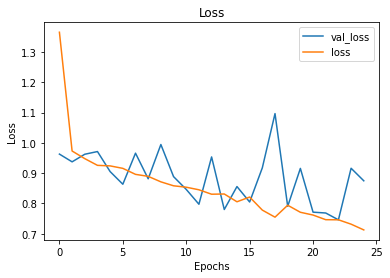

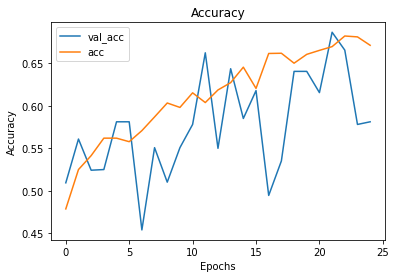

In [48]:
# call the visualizing function
visualize_training_results(results_1)

Training accuracy keeps increasing when going through more epochs.and the training loss keeps decreasing, which means that the model is  probably overfitting.

validation loss keeps decreasing as well as validation accuracy.

### Evaluate this model on the test data:

In [49]:
# Evaluate the model
test_loss, test_acc = model_1.evaluate(X_test,y_test)


40/40 [==============================] - 69s 2s/step - loss: 0.9168 - acc: 0.5836


We can notice that the model is overfitting, the model performed well on train data but won't be  able to predict test data.Avoiding overfitting can improve our model’s performance. We will do that by implementing one of Regularization techniques. 

In [50]:
# prediction
predictions =model_1.predict (X_test,batch_size=128)


In [51]:
# loop in prediction
for i in predictions:
    print(i)

[0.30677852 0.00871401 0.13481149 0.5496959 ]
[0.04534049 0.01094871 0.3759421  0.5677687 ]
[0.00365317 0.00101577 0.7891103  0.20622075]
[0.0138924  0.00500748 0.35813075 0.6229693 ]
[0.05755874 0.00271091 0.43720767 0.5025226 ]
[0.09895674 0.01063601 0.15837903 0.73202825]
[0.18720205 0.00626357 0.29166222 0.51487213]
[0.00211632 0.00068553 0.57581383 0.4213843 ]
[0.03486486 0.00534105 0.17590736 0.78388673]
[0.00840263 0.00221518 0.34737885 0.6420033 ]
[0.00443556 0.00175516 0.36849025 0.62531906]
[0.00689386 0.00170554 0.24312447 0.7482761 ]
[0.0224685  0.00411533 0.42681685 0.5465994 ]
[2.3204044e-03 5.3429953e-04 6.9856507e-01 2.9858023e-01]
[0.00863037 0.00089567 0.43124372 0.55923015]
[0.04565571 0.00907287 0.39383134 0.55144006]
[0.06519841 0.00688351 0.2904358  0.6374823 ]
[0.00430072 0.00100685 0.7051557  0.28953683]
[0.02959107 0.00366314 0.5170635  0.44968224]
[0.00592398 0.00161989 0.19684024 0.7956159 ]
[0.00834877 0.00221157 0.49524158 0.49419805]
[0.04299376 0.00505624

[0.00714253 0.00125741 0.6132713  0.37832883]
[0.00716259 0.00271914 0.5390123  0.45110592]
[0.04089125 0.00861148 0.31727874 0.6332185 ]
[0.00528254 0.0025396  0.47679624 0.51538163]
[0.03407674 0.00880186 0.27004898 0.68707234]
[0.00933938 0.0014913  0.6421394  0.34703   ]
[0.01038556 0.00191664 0.6552337  0.33246407]
[0.04920921 0.01007906 0.3855117  0.5552001 ]
[0.06729876 0.01181774 0.34135354 0.57953   ]
[0.06122378 0.00936806 0.35870138 0.5707068 ]
[0.0625978  0.00760537 0.30790028 0.6218966 ]
[0.02248908 0.00614555 0.27055237 0.700813  ]
[0.00685224 0.00227129 0.32239258 0.6684839 ]
[0.03766896 0.003666   0.49579996 0.46286505]
[0.00898963 0.00144879 0.47429264 0.515269  ]
[0.13062754 0.03829594 0.29113632 0.53994024]
[0.01457256 0.00579639 0.17352825 0.8061028 ]
[0.0166327  0.00233343 0.40721318 0.5738207 ]
[0.00693079 0.00089057 0.538055   0.4541236 ]
[0.02486483 0.00636629 0.20985042 0.75891846]
[0.00662999 0.00222918 0.30890763 0.6822332 ]
[0.0365857  0.00616514 0.33025876 

[0.00111962 0.00066151 0.63018984 0.36802906]
[0.04171685 0.00981644 0.5081743  0.44029236]
[0.01355525 0.00400247 0.37508538 0.6073569 ]
[0.00719732 0.00115543 0.52238965 0.4692576 ]
[0.0044797  0.00119662 0.58922404 0.4050997 ]
[0.03597755 0.01347291 0.3645779  0.5859716 ]
[0.00220991 0.0006189  0.5506142  0.44655696]
[0.00819828 0.00225695 0.26432082 0.72522396]
[0.00461738 0.00149917 0.21977049 0.774113  ]
[0.00478984 0.00178984 0.37398928 0.6194311 ]
[0.01365276 0.00448685 0.2299549  0.7519055 ]
[0.01567962 0.00439545 0.1730177  0.8069073 ]
[0.0718236  0.00326598 0.4445632  0.48034722]
[0.02151022 0.00314498 0.20954035 0.7658044 ]
[0.15294744 0.01986383 0.2906068  0.53658193]
[0.04476111 0.01388767 0.1378714  0.8034798 ]
[0.00865304 0.00205393 0.5122196  0.4770734 ]
[0.00332111 0.00131571 0.24789324 0.7474699 ]
[0.00815509 0.00247514 0.29377192 0.6955978 ]
[0.03033296 0.00375482 0.5408368  0.4250754 ]
[0.05069641 0.01651162 0.41930634 0.5134856 ]
[0.01085771 0.00296834 0.4623731  

[0.03524249 0.0068314  0.3630686  0.5948575 ]
[0.04796162 0.00842157 0.24316931 0.7004475 ]
[0.06892049 0.00808811 0.37243348 0.55055785]
[0.01082048 0.00101506 0.49444467 0.49371973]
[0.12956676 0.02323566 0.16617168 0.681026  ]
[0.02779317 0.00913527 0.34534892 0.6177226 ]
[7.5202849e-04 2.6882641e-04 6.9472623e-01 3.0425283e-01]
[2.5843414e-03 4.8241855e-04 7.1984434e-01 2.7708888e-01]
[0.0162884  0.00311433 0.24920538 0.7313919 ]
[0.08970179 0.00455439 0.44286945 0.4628744 ]
[0.01362492 0.00228441 0.4419386  0.54215205]
[0.07457469 0.00958101 0.40001798 0.51582634]
[0.01770592 0.00237177 0.43565452 0.5442677 ]
[3.2551123e-03 6.4476649e-04 7.1991873e-01 2.7618137e-01]
[0.08049279 0.01876203 0.3298271  0.570918  ]
[0.00388217 0.0010784  0.62300813 0.3720313 ]
[0.00598039 0.00063897 0.58050704 0.4128736 ]
[0.00405861 0.00076637 0.67868423 0.31649074]
[0.00980614 0.00193828 0.38323775 0.60501784]
[0.07300711 0.00926557 0.3088318  0.60889554]
[0.00330036 0.00068307 0.5495931  0.4464235 

[0.01954909 0.00257413 0.19604959 0.78182715]
[0.05713811 0.00976583 0.28970674 0.64338934]
[0.01774767 0.00179297 0.39791942 0.58254   ]
[0.00460117 0.00182933 0.5562931  0.4372764 ]
[0.00864852 0.00169714 0.46630424 0.5233502 ]
[0.06984524 0.00285573 0.45653653 0.47076243]
[1.8543776e-03 2.8082484e-04 8.0798388e-01 1.8988092e-01]
[0.02619633 0.00337806 0.5453808  0.42504486]
[0.01750841 0.00483968 0.30503795 0.672614  ]
[0.11910743 0.01258958 0.17957295 0.68873006]
[2.0135876e-03 6.0396915e-04 6.5862888e-01 3.3875358e-01]
[0.01649255 0.00837095 0.19439279 0.7807437 ]
[0.09278049 0.00690591 0.3869882  0.5133254 ]
[0.00369242 0.00080997 0.49588314 0.49961442]
[0.00746749 0.0008277  0.39280438 0.59890044]
[2.7436346e-03 4.9267558e-04 6.9363433e-01 3.0312943e-01]
[0.08948571 0.00480739 0.30174017 0.6039667 ]
[0.00339631 0.00079552 0.6701419  0.32566628]
[0.00311184 0.00095687 0.2910077  0.70492357]
[0.09681269 0.07994418 0.23327754 0.58996564]
[0.00435666 0.00057152 0.5079878  0.48708403

In [52]:
roundest_prediction = np.argmax(predictions,axis =1)

In [53]:
for i in roundest_prediction:
    print(i)

3
3
2
3
3
3
3
2
3
3
3
3
3
2
3
3
3
2
2
3
2
3
3
3
2
3
3
2
3
2
3
2
3
2
3
3
3
3
3
2
3
2
3
3
3
3
3
2
3
3
2
2
3
3
3
3
3
3
2
3
2
3
2
3
3
2
3
2
3
3
3
3
3
3
3
2
2
3
3
2
3
3
3
3
3
2
2
3
3
2
3
2
3
2
2
3
3
3
3
3
3
2
3
3
2
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
2
3
3
3
3
2
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
2
2
2
3
3
3
3
3
3
2
3
3
2
2
3
2
3
3
3
3
3
3
2
2
3
3
3
3
3
2
3
3
2
2
3
3
3
3
2
2
3
2
3
3
3
3
2
3
3
3
3
3
3
3
3
3
2
2
3
3
2
3
3
3
2
2
3
3
3
3
2
3
3
2
2
3
3
3
3
3
2
3
2
2
3
3
2
3
2
3
3
3
2
2
2
3
2
3
3
3
3
3
2
3
3
2
3
3
3
3
3
3
3
3
3
2
3
3
3
2
2
0
3
3
3
3
3
3
2
2
3
3
3
2
2
3
3
3
3
3
3
2
3
3
3
3
2
3
3
3
3
3
3
3
2
2
3
3
2
3
2
3
3
2
3
3
3
3
3
3
3
3
2
3
3
2
3
3
3
3
3
2
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
3
2
3
3
3
2
3
3
3
2
3
3
2
3
3
3
2
3
2
2
3
2
3
2
3
3
3
3
2
2
2
3
2
3
3
3
3
3
3
2
3
3
2
3
3
2
3
2
3
3
3
2
3
3
3
3
3
2
3
2
3
2
3
3
3
3
2
3
3
3
2
3
3
2
3
3
3
3
2
2
3
2
3
3
3
3
2
2
3
3
3
2
3
2
3
2
2
2
2
2
3
3
3
3
2
2
3
3
3
3
3
3
3
2
3
3
3
2
3
2
2
3
2
3


In [54]:
rounded_labels=np.argmax(y_test, axis=1)

# Confusion matrix
Confusion matrix:is a very handy tool for understanding the classification model performance.

In [1]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix (y_true = rounded_labels , y_pred = roundest_prediction)

In [57]:
print(cm)

[[  2   0   8 193]
 [  0   0   0  14]
 [  0   0 331 275]
 [  0   0  43 414]]


We will use plot_confusion_matrix function ,This function is from sklearn.metrics

In [58]:
# Visualize the confusion matrix
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.grid(False) 
        plt.show()

In [59]:
# set lables for the confusion matrix
cm_lables = ["Mild_Demented","Moderate_Demented","Non_Demented","Very_Mild_Demented"]

Confusion matrix, without normalization
[[  2   0   8 193]
 [  0   0   0  14]
 [  0   0 331 275]
 [  0   0  43 414]]


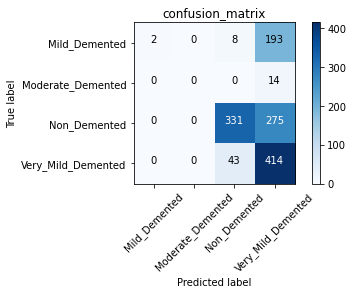

In [60]:
#call the  function to plot confusion matrics
plot_confusion_matrix(cm = cm,classes = cm_lables, title = "confusion_matrix" )

## Create the classification_report and Confusion matrices

By using the classification_report() function in the sklearn.metrics module

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score

In [61]:
from sklearn.metrics import classification_report

In [62]:
# calculate metrics by using classfication report
c_r = classification_report(rounded_labels,roundest_prediction)
print(c_r)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       203
           1       0.00      0.00      0.00        14
           2       0.87      0.55      0.67       606
           3       0.46      0.91      0.61       457

    accuracy                           0.58      1280
   macro avg       0.58      0.37      0.33      1280
weighted avg       0.73      0.58      0.54      1280



C:\Users\mays8\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision — What percent of your predictions were correct?

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?

F1 Score = 2(Recall Precision) / (Recall + Precision)



Our model wasn't able to report the(precision, recall,f1-score )metrics for class 1 (Moderate_Demented)
because of the imbalanced data problem.

 

### Tune a model for optimal performance:

We can tune our model to achieve better performance by:

Regularization For neural networks is a technique that makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well. Regularization includes L1, L2, Dropout techniques. 

Optimization look at alternative optimization algorithms.

Convolutional Neural Networks: Convolutional Neural Networks are often preferred over densely connected networks for image processing in order to achieve well trained models that are neither overfit nor underfit.


## Model 2: Convolutional neural network 
Convolutional neural network models work phenomenally well on computer vision tasks like image classification, object detection, image recognition,

CNN could be used to progressively extract higher- and higher-level representations of the image content.

A CNN takes just the image's raw pixel data as input and "learns" how to extract these features, and ultimately infer what object they constitute.

The images fed to these networks must be converted to a numerical representation.To start, the CNN receives an input feature map: a three-dimensional matrix where the size of the first two dimensions corresponds to the length and width of the images in pixels. The size of the third dimension is 3 (corresponding to the 3 channels of a color image: red, green, and blue).

The convolutional neural network performs three operations. :


1-Convolution: reducing the size of the numerical representation sent to the CNN. only features that are important in classifying an image (textures, edges, shapes) are sent to the neural network .

Convolutions are defined by few parameters:

A-Filters :

The first required Conv2D parameter is the number of filters that the convolutional layer will learn.

closer to the actual input image learn fewer convolutional filters while layers deeper in the network  closer to the output predictions will learn more filters.

recommend starting with filters in the range [32, 64, 128] in the earlier and increasing up to [256, 512, 1024] in the deeper layers.

B-kernel_size:

A 2-tuple specifying the width and height of the 2D convolution window. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1), (3, 3), (5, 5), and (7, 7). It’s rare to see kernel sizes larger than 7×7. If your input images are greater than 128×128 you may choose to use a kernel size > 3 to help (1) learn larger spatial filters and (2) to help reduce volume size.in general, typically 3x3 or 5x5 pixels are often the popular choice!

C-The sliding :

The strides parameter is a 2-tuple of integers, specifying the “step” of the convolution along the x and y-axis of the input volume.

The strides value defaults to (1, 1), you may occasionally increase it to (2, 2) to help reduce the size of the output volume.

D-Padding:

The padding parameter to the Keras Conv2D class involves increasing the size of the input image can take on one of two values: valid or same.
While the default Keras Conv2D value is valid.

E-Activation :

(ReLU) transformation is applied after every convolution operation to ensure non-linearity.After the transformation, all values below zero are returned as zero while the other values are returned as they are.

2- Pooling: 
    
The CNN downsamples the convolved feature (to save on processing time), reducing the number of dimensions of the feature map, while still preserving the most critical feature information. A common algorithm used for this process is called max pooling.
Max pooling operates in a similar fashion to convolution. We slide over the feature map and extract tiles of a specified size. For each tile, the maximum value is output to a new feature map, and all other values are discarded. Max pooling operations take two parameters:

Size of the max-pooling filter (typically 2x2 pixels)
Stride: the distance, in pixels, separating each extracted tile. Unlike with convolution, where filters slide over the feature map pixel by pixel, in max pooling, the stride determines the locations where each tile is extracted. For a 2x2 filter, a stride of 2 specifies that the max pooling operation will extract all nonoverlapping 2x2 tiles from the feature map   

![maxpool_animation.gif](images/maxpool_animation.gif)

3-Dropout: 

Sets the output of some neurons to zero. used to improve the generalization performance of the model. Generalization is achieved by making the learning features independent and not heavily correlated.
Dropout usually between 0.2 and 0.5.

In [64]:
# import neccessary models
from tensorflow.keras import layers, models

In [65]:
# create a Convolution netwobrk
model_2 = models.Sequential()
model_2.add(layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3))),
model_2.add(layers.MaxPooling2D((2, 2))),

model_2.add(layers.Conv2D(64, (3, 3), activation='relu')),
model_2.add(layers.MaxPooling2D((2, 2))),
model_2.add(layers.Dropout(0.25)),
            
model_2.add(layers.Conv2D(128, (3, 3), activation='relu')),
model_2.add(layers.MaxPooling2D((2, 2))),
model_2.add(layers.Dropout(0.25)),
            
model_2.add(layers.Flatten()),
            
model_2.add(layers.Dense(128, activation='relu')),
model_2.add(layers.Dense(4, activation='softmax'))
            


We used  32,64,128 filters,kernal size (3*3),activation='relu' ,Max pooling ,and Dropout=0.25 in hidden layers ,on the other hand 4 filters ,activation='softmax'

In [66]:
# model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)      

This network has a total of 1,732,292 trainable parameters (consisting of weights between neurons and bias terms) and this gives the network a lot of flexibility.

Let's look at alternative optimization algorithms like Adam optimizer.

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models for computer vision . Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [67]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [69]:
# fit the model on the training dataset
results_2 = model_2.fit(X_train, y_train,
                        epochs=25, 
                        batch_size=64, 
                        validation_data=(X_val, y_val))


Epoch 1/25
60/60 [==============================] - 122s 2s/step - loss: 0.8423 - acc: 0.6263 - val_loss: 0.7817 - val_acc: 0.6477
Epoch 2/25
60/60 [==============================] - 123s 2s/step - loss: 0.7765 - acc: 0.6466 - val_loss: 0.7664 - val_acc: 0.6945
Epoch 3/25
60/60 [==============================] - 127s 2s/step - loss: 0.6884 - acc: 0.6945 - val_loss: 0.6592 - val_acc: 0.7328
Epoch 4/25
60/60 [==============================] - 143s 2s/step - loss: 0.6070 - acc: 0.7422 - val_loss: 0.5624 - val_acc: 0.7625
Epoch 5/25
60/60 [==============================] - 120s 2s/step - loss: 0.5318 - acc: 0.7737 - val_loss: 0.5030 - val_acc: 0.7922
Epoch 6/25
60/60 [==============================] - 119s 2s/step - loss: 0.4457 - acc: 0.8154 - val_loss: 0.4428 - val_acc: 0.8367
Epoch 7/25
60/60 [==============================] - 131s 2s/step - loss: 0.3528 - acc: 0.8612 - val_loss: 0.3528 - val_acc: 0.8609
Epoch 8/25
60/60 [==============================] - 135s 2s/step - loss: 0.3092 - a

The number of epoch we decided to use is 25. As the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.

The batch size we used is 64 .

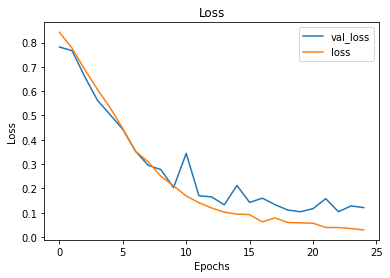

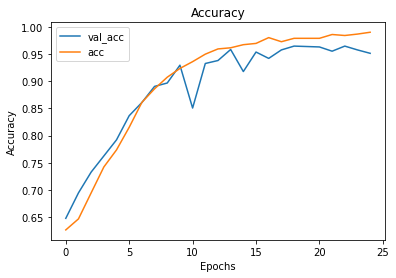

In [70]:
# call the visualization function
visualize_training_results(results_2)

The accuracy for both training and validation sets keeps increasing.
The loss function for both training and validation sets keeps decreasing.

In [71]:
# evaluate the model on X_test
test_loss, test_acc = model_2.evaluate(X_test,y_test)


40/40 [==============================] - 15s 374ms/step - loss: 0.1355 - acc: 0.9555


We can notice we got better accuracy on this model by using the Convolutional neural network. but we didnt fix the problem of imbalanced data.

## Model 3: Convolutional neural network with Data augmentation

We have an imbalanced data problem.We will implement the data augmentation technique on our model to solve the problem.

Data augmentation, a technique for minority class oversampling, is widely used to increase the image recognition performance for deep learning 

We will focus on five main types of data augmentation techniques for image data; specifically:

Image shifts via the width_shift_range and height_shift_range arguments.

Image flips via the horizontal_flip and vertical_flip arguments.

Image rotations via the rotation_range argument

Image shear via the shear_range argument.'Shear' means that the image will be distorted along an axis. 

fill_mode argument and the default value is “nearest” which simply replaces the empty area with the nearest pixel values

In [72]:
# ImageDataGenerator 
from keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(
        rotation_range=4,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [73]:
# ImageDataGenerator
val_datagen = ImageDataGenerator() 

In [74]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)
val_generator = val_datagen.flow(X_val, y_val, batch_size=128)

In [81]:
# create a Convolution network
model_3 = models.Sequential()
model_3.add(layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3))),
model_3.add(layers.MaxPooling2D((2, 2))),

model_3.add(layers.Conv2D(64, (3, 3), activation='relu')),
model_3.add(layers.MaxPooling2D((2, 2))),
model_3.add(layers.Dropout(0.25)),
            
model_3.add(layers.Conv2D(128, (3, 3), activation='relu')),
model_3.add(layers.MaxPooling2D((2, 2))),
model_3.add(layers.Dropout(0.25)),

model_3.add(layers.Conv2D(256, (3, 3), activation='relu')),
model_3.add(layers.MaxPooling2D((2, 2))),
model_3.add(layers.Dropout(0.25)),
            
model_3.add(layers.Flatten()),

model_3.add(layers.Dense(128, activation='relu')),           
model_3.add(layers.Dense(64, activation='relu')),
model_3.add(layers.Dense(4, activation='softmax'))
            


In [82]:
# model summary
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 128)      

This network has a total of 650,884  trainable parameters (consisting of weights between neurons and bias terms) and this gives the network a lot of flexibility.

In [83]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [84]:
# fit the model on training set
reults_3 = model_3.fit_generator(train_generator,
                              steps_per_epoch=len(X_train) // 128,
                              epochs=150,
                              validation_data=val_generator,
                              validation_steps=len(X_val) // 128)


Epoch 1/150
30/30 [==============================] - 123s 4s/step - loss: 1.0724 - acc: 0.4867 - val_loss: 1.0379 - val_acc: 0.5023
Epoch 2/150
30/30 [==============================] - 140s 5s/step - loss: 1.0336 - acc: 0.4818 - val_loss: 1.0649 - val_acc: 0.5023
Epoch 3/150
30/30 [==============================] - 140s 5s/step - loss: 1.0144 - acc: 0.5081 - val_loss: 1.0154 - val_acc: 0.5023
Epoch 4/150
30/30 [==============================] - 139s 5s/step - loss: 0.9869 - acc: 0.5177 - val_loss: 1.0526 - val_acc: 0.4711
Epoch 5/150
30/30 [==============================] - 137s 5s/step - loss: 0.9739 - acc: 0.5299 - val_loss: 0.9889 - val_acc: 0.4984
Epoch 6/150
30/30 [==============================] - 131s 4s/step - loss: 0.9667 - acc: 0.5276 - val_loss: 1.0063 - val_acc: 0.5133
Epoch 7/150
30/30 [==============================] - 134s 4s/step - loss: 0.9459 - acc: 0.5445 - val_loss: 1.0260 - val_acc: 0.4766
Epoch 8/150
30/30 [==============================] - 137s 5s/step - loss: 0.

30/30 [==============================] - 129s 4s/step - loss: 0.5909 - acc: 0.7323 - val_loss: 0.4488 - val_acc: 0.7930
Epoch 124/150
30/30 [==============================] - 132s 4s/step - loss: 0.5933 - acc: 0.7326 - val_loss: 0.4476 - val_acc: 0.8133
Epoch 125/150
30/30 [==============================] - 133s 4s/step - loss: 0.5785 - acc: 0.7490 - val_loss: 0.4907 - val_acc: 0.7812
Epoch 126/150
30/30 [==============================] - 129s 4s/step - loss: 0.5916 - acc: 0.7292 - val_loss: 0.4441 - val_acc: 0.8117
Epoch 127/150
30/30 [==============================] - 130s 4s/step - loss: 0.5778 - acc: 0.7451 - val_loss: 0.4654 - val_acc: 0.7953
Epoch 128/150
30/30 [==============================] - 133s 4s/step - loss: 0.5657 - acc: 0.7458 - val_loss: 0.4711 - val_acc: 0.7922
Epoch 129/150
30/30 [==============================] - 126s 4s/step - loss: 0.5675 - acc: 0.7471 - val_loss: 0.4255 - val_acc: 0.8188
Epoch 130/150
30/30 [==============================] - 132s 4s/step - loss: 

The number of epoch we decided to use is 150. As the number of epochs increases, the same number of times weights are changed in the neural network.

The batch size we used is 128 increasing batch size lowers performance. adding to the batch size reduces the validation loss.

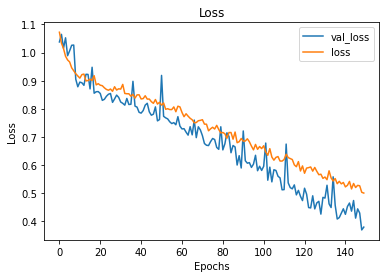

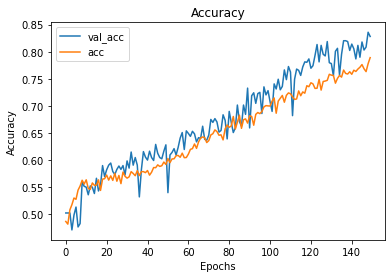

In [85]:
visualize_training_results(reults_3)

In [86]:
# evaluate the model on X_test
test_loss, test_acc = model_3.evaluate(X_test,y_test)


40/40 [==============================] - 14s 353ms/step - loss: 0.3964 - acc: 0.8297


In [87]:
# prediction
predictions =model_3.predict (X_test,batch_size=128)


In [88]:
for i in predictions:
    print(i)

[9.7823650e-01 2.5351771e-10 1.5456545e-03 2.0217834e-02]
[5.17939124e-03 4.13729140e-09 1.49905905e-02 9.79830027e-01]
[2.9683290e-06 1.4779204e-14 9.9890292e-01 1.0940861e-03]
[3.6558061e-04 2.3260231e-08 2.7279076e-01 7.2684360e-01]
[5.0121122e-03 7.9312308e-08 3.7769701e-02 9.5721817e-01]
[3.6769118e-02 5.7087058e-05 4.3509892e-01 5.2807480e-01]
[8.4648263e-01 6.0955507e-10 8.0641434e-03 1.4545332e-01]
[1.4020298e-03 9.1956861e-07 9.8312610e-01 1.5470932e-02]
[5.0410596e-03 8.5380470e-06 2.1425096e-02 9.7352535e-01]
[1.5134593e-03 7.4176043e-10 9.5734292e-01 4.1143589e-02]
[4.3783942e-04 4.3767699e-08 5.8898836e-02 9.4066322e-01]
[5.7622686e-04 1.3685477e-08 2.5048470e-01 7.4893904e-01]
[1.3209328e-01 4.1372157e-05 8.5513389e-01 1.2731393e-02]
[1.5582035e-07 6.6609540e-20 9.8808795e-01 1.1911933e-02]
[1.9881837e-02 2.4640168e-11 7.1389550e-01 2.6622263e-01]
[3.8160954e-04 1.1888258e-04 9.9917752e-01 3.2195912e-04]
[2.4705218e-01 2.8335940e-06 7.3257720e-01 2.0367790e-02]
[1.7536067

[1.2902263e-01 2.2536685e-14 1.5128134e-01 7.1969599e-01]
[2.5924679e-11 6.6451929e-20 9.9944907e-01 5.5089139e-04]
[9.7769493e-01 1.9314465e-10 2.0178200e-05 2.2284890e-02]
[9.7044939e-01 2.2789718e-06 5.1884651e-03 2.4359860e-02]
[1.53256785e-02 4.41320117e-06 9.99648273e-02 8.84705067e-01]
[9.5125992e-04 7.4175128e-12 8.4278089e-01 1.5626787e-01]
[5.6027202e-05 7.3661801e-13 9.4797319e-01 5.1970720e-02]
[9.9991882e-01 2.0071523e-08 2.2653823e-05 5.8543137e-05]
[2.5483205e-03 2.9312307e-07 1.0928811e-02 9.8652261e-01]
[2.6750236e-03 7.0971400e-05 9.6096593e-01 3.6288034e-02]
[8.89280818e-06 1.30408352e-13 1.08829085e-02 9.89108205e-01]
[3.7090829e-01 1.1554597e-05 1.5097804e-02 6.1398238e-01]
[2.1636128e-01 9.8456905e-05 1.4156653e-02 7.6938361e-01]
[7.9052657e-01 8.9269757e-05 6.4773387e-03 2.0290686e-01]
[4.0264972e-06 5.7565004e-18 9.9994981e-01 4.6114277e-05]
[2.0780950e-05 1.5001480e-09 9.9571311e-01 4.2661526e-03]
[6.3704930e-02 4.5444003e-06 9.3292421e-01 3.3663320e-03]
[1.170

[1.1199460e-02 1.4763434e-09 6.9919665e-06 9.8879355e-01]
[6.4327028e-03 9.9257565e-01 9.3187572e-04 5.9726270e-05]
[5.0236158e-02 4.3740369e-05 9.3931757e-02 8.5578835e-01]
[8.7081539e-03 1.3891211e-05 6.0732335e-01 3.8395450e-01]
[4.7509924e-01 5.1179341e-09 4.9048115e-02 4.7585264e-01]
[2.8049658e-04 6.4637156e-08 7.7357727e-01 2.2614217e-01]
[4.3319396e-06 4.8944841e-11 1.5406492e-03 9.9845505e-01]
[4.2803734e-08 3.5265275e-25 8.6135471e-10 1.0000000e+00]
[0.86736673 0.00115213 0.06404196 0.06743918]
[3.3243901e-01 1.5169579e-07 1.3468296e-02 6.5409249e-01]
[9.9742967e-01 3.0963225e-09 1.7071529e-03 8.6312636e-04]
[5.5671565e-09 3.9396341e-24 9.9998724e-01 1.2739079e-05]
[2.8807896e-01 1.0144212e-06 2.2667468e-01 4.8524529e-01]
[4.3306887e-02 3.5609467e-08 1.8164915e-01 7.7504390e-01]
[7.3218995e-09 5.8861478e-14 9.2083836e-01 7.9161644e-02]
[6.2899511e-07 1.2556837e-13 1.1927896e-01 8.8072038e-01]
[6.851817e-02 3.721209e-07 8.659187e-01 6.556273e-02]
[1.6981825e-01 1.7790093e-06 5

[4.0382488e-09 1.1177508e-17 9.9248946e-01 7.5105815e-03]
[9.4804818e-08 1.3879443e-19 9.9990296e-01 9.6870477e-05]
[7.5540354e-04 4.2610987e-10 9.7561044e-01 2.3634141e-02]
[2.0011393e-10 3.8242946e-25 9.9999809e-01 1.8576727e-06]
[1.19625896e-01 1.77227586e-04 4.60176140e-01 4.20020670e-01]
[0.03229777 0.0213482  0.94534504 0.00100895]
[1.2149063e-03 2.4753951e-12 1.3343963e-02 9.8544115e-01]
[2.4519992e-05 3.7399944e-12 5.0272435e-01 4.9725118e-01]
[5.9892011e-01 3.5117328e-06 9.7622737e-02 3.0345368e-01]
[8.4462641e-03 4.8579366e-11 5.2721810e-01 4.6433571e-01]
[3.3574030e-02 6.0271934e-05 9.2340988e-01 4.2955756e-02]
[8.0866050e-03 2.1527391e-08 1.4235429e-01 8.4955913e-01]
[1.2272051e-05 1.3540679e-15 9.9690479e-01 3.0830009e-03]
[8.3188716e-05 8.2143661e-09 2.7473729e-02 9.7244304e-01]
[1.4166058e-02 1.2787673e-09 9.6861970e-01 1.7214296e-02]
[7.0044212e-03 2.9846912e-13 5.5507249e-01 4.3792313e-01]
[6.1579961e-01 1.9937048e-10 1.7879689e-04 3.8402158e-01]
[0.8182985  0.00729896

[7.1246885e-02 1.3044800e-11 6.8218273e-01 2.4657036e-01]
[6.4393625e-02 4.6902071e-05 7.1791559e-01 2.1764399e-01]
[2.6999694e-05 2.9143441e-13 4.2207515e-01 5.7789785e-01]
[0.16259097 0.00237779 0.01038851 0.8246427 ]
[9.3840384e-01 5.7601488e-07 2.4180065e-03 5.9177615e-02]
[5.7150158e-03 2.0275856e-10 8.6128539e-01 1.3299958e-01]
[2.4072724e-05 7.5677650e-15 1.3619840e-02 9.8635602e-01]
[5.0889630e-05 4.5855774e-08 3.0253032e-01 6.9741875e-01]
[9.8865104e-01 1.3149633e-12 1.8664928e-04 1.1162284e-02]
[9.7876127e-06 2.7920781e-13 9.7205317e-01 2.7937101e-02]
[7.438570e-04 1.491957e-09 8.344032e-02 9.158158e-01]
[0.04140917 0.94110036 0.015637   0.00185341]
[5.4205841e-05 2.5457772e-12 9.4696659e-01 5.2979212e-02]
[9.2482752e-01 3.9000697e-05 1.1031652e-02 6.4101867e-02]


In [89]:
roundest_prediction = np.argmax(predictions,axis =1)

In [90]:
for i in roundest_prediction:
    print(i)

0
3
2
3
3
3
0
2
3
2
3
3
2
2
2
2
2
2
2
3
2
2
0
3
2
0
0
2
0
0
3
3
0
2
3
3
0
3
2
2
3
2
0
0
2
0
2
2
3
2
2
3
2
0
0
3
2
2
2
3
2
3
2
3
2
2
3
2
2
2
0
0
0
3
2
2
2
3
3
2
0
2
0
2
3
3
3
2
0
2
3
2
3
2
2
2
3
3
3
3
3
3
0
3
2
0
2
2
2
3
3
3
2
2
3
2
3
0
0
2
0
2
3
2
3
0
3
0
2
0
2
2
0
0
2
2
0
3
3
2
3
2
3
1
2
2
0
3
1
3
3
2
2
2
2
3
2
0
0
2
0
2
0
0
2
3
2
3
0
2
3
0
2
0
3
2
2
2
2
3
2
2
3
2
2
3
2
2
2
3
3
2
3
3
3
3
2
3
3
3
2
3
0
2
3
3
2
2
2
2
3
3
2
2
2
2
2
3
3
3
2
0
0
2
2
0
0
2
2
0
2
2
3
2
2
2
2
2
2
2
0
0
3
2
2
2
3
2
2
3
2
2
0
3
3
0
2
3
0
0
3
2
2
3
2
2
2
2
2
3
2
2
0
2
0
0
2
2
3
2
0
2
2
0
2
2
2
0
3
2
0
0
3
2
2
0
3
2
3
3
3
0
2
2
2
2
3
3
2
3
3
0
2
0
3
0
2
3
3
3
2
3
3
2
0
2
0
0
2
2
2
3
2
0
3
3
0
2
0
0
2
3
3
3
2
3
2
3
2
2
3
2
3
2
3
2
3
2
3
2
2
2
0
2
2
0
3
3
3
2
3
0
2
3
2
3
3
2
2
0
1
3
0
2
2
2
2
0
2
2
2
0
2
3
2
2
2
2
3
3
3
3
2
2
2
2
2
3
2
1
3
2
3
3
3
2
2
3
2
2
3
2
2
2
3
3
3
2
3
0
3
3
3
2
3
2
0
3
1
3
2
3
2
2
3
3
2
0
2
2
0
0
2
3
2
2
0
2
3
2
2
0
3
3
3
2
2
3
0
2
0
3
3
3
2
2
2
3
2
3
2
2
3
3
2
2
3
0
2
2
3
3
3
2
2
2
2
2
0
2


In [91]:
# create the confusion matrix
cm = confusion_matrix (y_true = rounded_labels , y_pred = roundest_prediction)

In [92]:
print(cm)

[[178   0  11  14]
 [  1  12   0   1]
 [  9   1 528  68]
 [ 40   2  71 344]]


Confusion matrix, without normalization
[[178   0  11  14]
 [  1  12   0   1]
 [  9   1 528  68]
 [ 40   2  71 344]]


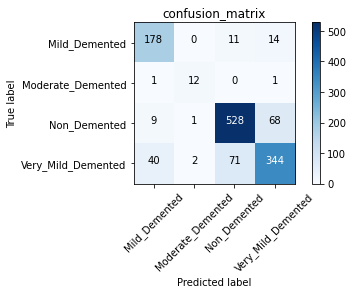

In [93]:
# call the function to plot the confusion matrix
plot_confusion_matrix(cm = cm,classes = cm_lables, title = "confusion_matrix" )

In [94]:
# calculate metrics by using classfication report
c_r = classification_report(rounded_labels,roundest_prediction)
print(c_r)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       203
           1       0.80      0.86      0.83        14
           2       0.87      0.87      0.87       606
           3       0.81      0.75      0.78       457

    accuracy                           0.83      1280
   macro avg       0.81      0.84      0.83      1280
weighted avg       0.83      0.83      0.83      1280



The third model didn't give us better performance but was more stable since we used Data augmentation to fix imbalanced data problem. 

## Evaluation

The best model based on performance and Recall is the Convolutional neural network with Data augmentation.

We evaluated our final model based on the Recall score metric as well as the F1 score, and the model accuracy which equals 83% .

Recall — What percent of the positive cases did the model catch?

Recall = TP/(TP+FN)

How to calculate FN, FP, TN, and TP for multi classes? 

TP: The True positive value is where the actual value and predicted value are the same. 

FN: The False-negative value for a class will be the sum of values of corresponding rows except for the TP value. 

FP: The False-positive value for a class will be the sum of values of the corresponding column except for the TP value. 

TN: The True Negative value for a class will be the sum of values of all columns and rows except the values of that class that we are calculating the values for.

Confusion Matrix gives a comparison between Actual and predicted values.Confusion Matrix allows us to measure the Recall, Precision, and Accuracy of the model. 

class 0 (Mild Demented):

TP: The model predicted that 178 cases are belong to Mild Demented class and that is actually true.

FN: The model predicted that (0 + 11 + 14) = 25 cases are not  belong to Mild Demented class and that actually false.

The recall for class 0 is 88%.

class 1 (Moderate Demented) :

TP: The model predicted that 12 cases are belong to Moderate Demented class and that is actually true.

FN: The model predicted that (1+ 0+1) =2 cases are not  belong to Moderate Demented Demented class and that actually false.

The recall for class 1 is 86%.

class 2(Non Demented) :

TP: The model predicted that 528 cases are belong to Non Demented class and that is actually true.

FN: The model predicted that (9+1+68) =78 cases are not  belong to Non Demented Demented class and that actually false.

The recall for class 2 is 87%.


class 3 (Very Mild Demented):

TP: The model predicted that 344 cases are belong to Very Mild Demented class and that is actually true.

FN: The model predicted that (40 +2+71)=113 cases are not belong to Very Mild Demented class and that is actually false.

The recall for class 3 is 75%.



## Conclusion and Recommendations


Currently, more than 55 million people live with dementia worldwide, and there are nearly 10 million new cases every year. Alzheimer's disease is the most common form of dementia and may contribute to 60-70% of cases.

There are three stages of Alzheimer's disease:

Mild Demented,Moderate Demented,Very Mild Demented

For anyone facing cognitive issues,the idea of obtaining an AD diagnosis is understandably terrifying.

Early detection of the disease is worth in finding ways to head off brain damage before the later stages of Alzheimer’s.

We are providing some recommendations for the researchers regarding Alzheimer’s Detection and Diagnosis :

1- Being aware of Alzheimer’s signs and symptoms is essential for diagnosing the disease.
The characteristic symptoms include difficulties with memory, language, problem-solving, and other cognitive skills that affect a person’s ability to perform everyday activities.

2- Develop and maintain routine procedures for checking brain health and cognitive aging by making early brain screening that can determine the stage of disease and provide the proper Anti-dementia medicines for each case.

3- Publishing the new research paper, and keeping investigating new treatments can offer support for healthcare providers and improve the quality of life of patients and families.

## Next Steps

Further data could be collected that can help in detecting each type of Alzheimer's disease and further analyses could yield additional insights to improve the model performance.
